In [ ]:
#!pip install mplfinance
#!pip install opendatasets

# Libraries

In [ ]:
# Basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt


# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
from keras.layers import LSTM

#Load Data

In [ ]:
df=pd.read_csv('/content/weatherHistory.csv')
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [ ]:
df = df.loc[:, ['Formatted Date','Temperature (C)']]

In [ ]:
df.sample(5)

Formatted Date  Temperature (C)
73324  2014-01-20 04:00:00.000 +0100         8.888889
58147  2012-03-25 20:00:00.000 +0200        15.172222
67346  2013-05-14 03:00:00.000 +0200         8.177778
2326   2006-02-13 22:00:00.000 +0100        -4.283333
57916  2012-03-17 04:00:00.000 +0100         2.050000

# EDA DF

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.isnull().sum()

index              0
Formatted Date     0
Temperature (C)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            96453 non-null  int64  
 1   Formatted Date   96453 non-null  object 
 2   Temperature (C)  96453 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
df.describe(include='all')

index                 Formatted Date  Temperature (C)
count   96453.000000                          96453     96453.000000
unique           NaN                          96429              NaN
top              NaN  2010-08-02 00:00:00.000 +0200              NaN
freq             NaN                              2              NaN
mean    48226.000000                            NaN        11.932678
std     27843.727094                            NaN         9.551546
min         0.000000                            NaN       -21.822222
25%     24113.000000                            NaN         4.688889
50%     48226.000000                            NaN        12.000000
75%     72339.000000                            NaN        18.838889
max     96452.000000                            NaN        39.905556

In [ ]:
df.sample(5)

index                 Formatted Date  Temperature (C)
40105  40105  2010-06-07 01:00:00.000 +0200        16.394444
41607  41607  2010-05-07 16:00:00.000 +0200        20.066667
91584  91584  2016-07-02 03:00:00.000 +0200        18.266667
42384  42384  2010-10-01 01:00:00.000 +0200         5.883333
5058    5058  2006-06-08 18:00:00.000 +0200        16.361111

#Visualization


In [ ]:

tdata  = df.set_index('Formatted Date')
tdata.index = pd.to_datetime(tdata.index,  utc=True)
tdata = tdata.resample('D').mean()

tdata = tdata.asfreq('D')

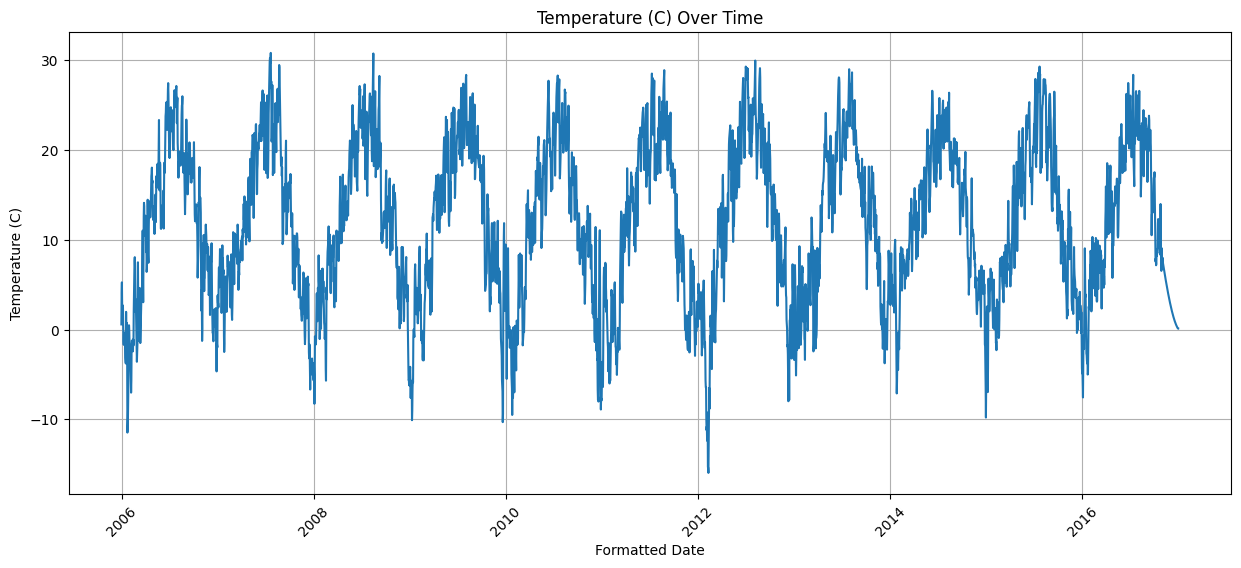

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(tdata['Temperature (C)'])
plt.title('Temperature (C) Over Time')
plt.xlabel('Formatted Date')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

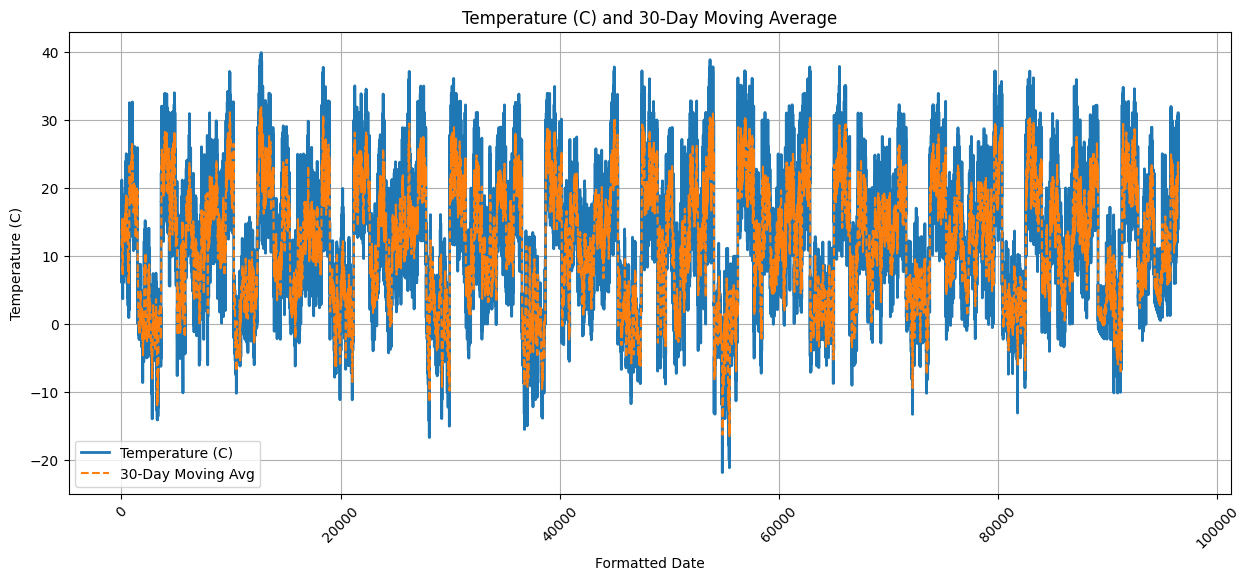

In [ ]:
window = 30
plt.figure(figsize=(15, 6))
plt.plot( df['Temperature (C)'], label='Temperature (C)', linewidth=2)
plt.plot( df['Temperature (C)'].rolling(window=window).mean(), label=f'{window}-Day Moving Avg', linestyle='--')
plt.title(f'Temperature (C) and {window}-Day Moving Average')
plt.xlabel('Formatted Date')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Preprocessing

In [ ]:
new_df = df.reset_index()['Temperature (C)']

In [ ]:
# df['Month'] = df['Formatted Date'].dt.month
# df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

# monthly_average = df.groupby('Month')['Temperature (C)'].mean()

# plt.figure(figsize=(15, 6))
# plt.plot(monthly_average.index, monthly_average.values, marker='o')
# plt.title(f'Monthly {new_df}')
# plt.xlabel('Months')
# plt.ylabel('Average Temperature (C)')
# plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# plt.grid(True)
# plt.show()

## Normalize the values

In [ ]:
values_to_scale = df['Temperature (C)'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(values_to_scale)

## Data Splitting

In [ ]:
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Define the window (past time steps)

In [ ]:
n_past = 60

X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(77102, 60)
(77102,)


Testing set size:-
(19231, 60)
(19231,)


(None, None)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Modeling

In [ ]:
model = Sequential()

model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 60, 100)             │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 60, 50)              │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,851 (89.26 KB)

 Trainable params: 22,851 (89.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=5,
          batch_size=100,
          verbose=1,
          callbacks= [ early_stopping])

Epoch 1/5
772/772 ━━━━━━━━━━━━━━━━━━━━ 98s 119ms/step - loss: 0.0188 - val_loss: 0.0027
Epoch 2/5
772/772 ━━━━━━━━━━━━━━━━━━━━ 91s 118ms/step - loss: 0.0032 - val_loss: 7.2024e-04
Epoch 3/5
772/772 ━━━━━━━━━━━━━━━━━━━━ 91s 119ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 4/5
772/772 ━━━━━━━━━━━━━━━━━━━━ 146s 124ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 5/5
772/772 ━━━━━━━━━━━━━━━━━━━━ 138s 119ms/step - loss: 0.0015 - val_loss: 0.0011


In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2410/2410 ━━━━━━━━━━━━━━━━━━━━ 89s 37ms/step
601/601 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

14.272294151713508
14.208074729323984


## Visualization of results

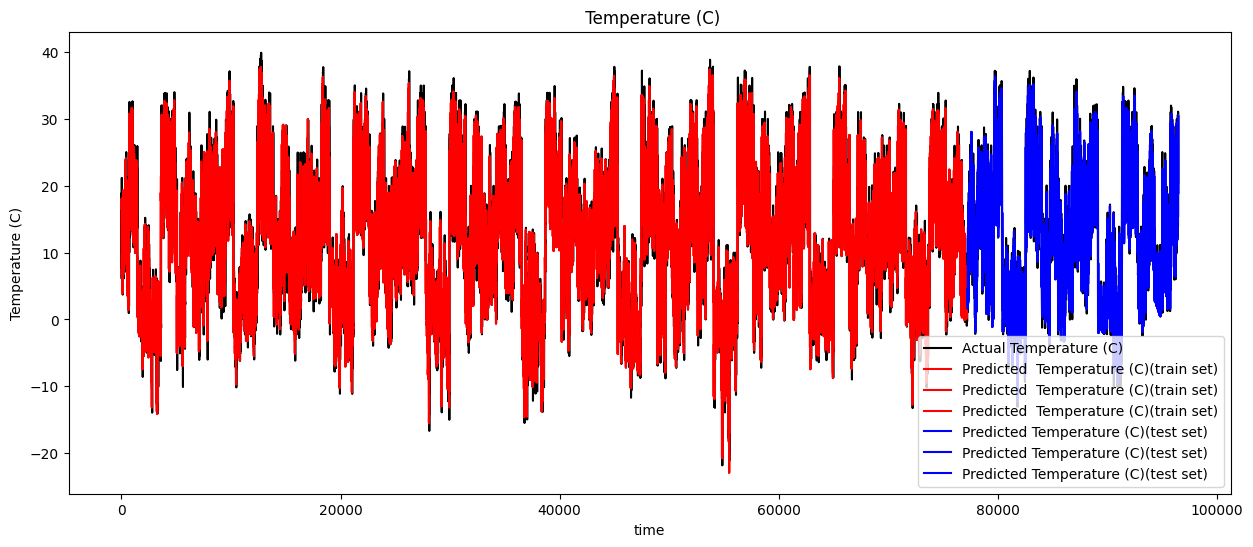

In [ ]:
look_back = 30

trainPredictPlot = np.empty_like(df)
trainPredictPlot[:] = np.nan

trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict

testPredictPlot = np.empty_like(df,dtype=float)
testPredictPlot[:] = np.nan

test_start = len(df) - len(test_predict)

testPredictPlot[test_start:] = test_predict

original_scaled_data = scaler.inverse_transform(scaled_data)

plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual Temperature (C)")
plt.plot(trainPredictPlot, color='red', label=f"Predicted  Temperature (C)(train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted Temperature (C)(test set)")

plt.title(f" Temperature (C)")
plt.xlabel("time")
plt.ylabel(f"Temperature (C)")
plt.legend()
plt.show()

In [ ]:

last_sequence = X_test[-1]


last_sequence = last_sequence.reshape(1, n_past, 1)
predictions_next_15_days = []
for _ in range(15):
    next_day_prediction = model.predict(last_sequence)
    predictions_next_15_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

predictions_next_15_days = scaler.inverse_transform(np.array(predictions_next_15_days).reshape(-1, 1))

print("Predictions for the next 15 days:")
for i, prediction in enumerate(predictions_next_15_days, start=1):
    print(f"Day {i}: sales = {prediction[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predictions for the next 15 days:
Day 1: sales = 18.91899299621582
Day 2: sales = 17.705053329467773
Day 3: sales = 16.89452362060547
Day 4: sales = 15.877412796020508
Day 5: sales = 15.104976654052734
Day 6: sales = 14.712042808532715
Day 7: sales = 14.631271362304688
Day 8: sales = 15.045066833496094
Day 9: sales = 15.914017677307129
Day 10: sales = 17.3543643951416
Day 11: sales = 19.139284133911133
Day 12: sales = 21.05461

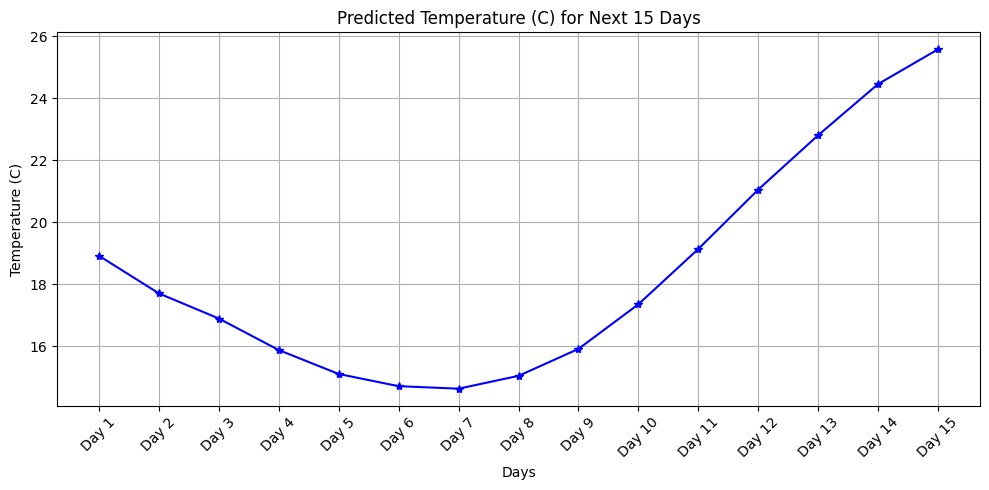

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(predictions_next_15_days, marker='*', linestyle='-', color='blue')
plt.title(f'Predicted Temperature (C) for Next 15 Days')
plt.xlabel('Days')
plt.ylabel('Temperature (C)')


plt.xticks(ticks=range(15), labels=[f'Day {i+1}' for i in range(15)], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()